In [1]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
# Ruta del dataset
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"
df = pd.read_csv(ruta_dataset)

In [6]:
# Estructura del dataset
print("Estructura del dataset:")
print(df.info())

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AÑO                           917885 non-null  int64  
 1   TRIMESTRE                     917885 non-null  float64
 2   PROVEEDOR                     917885 non-null  object 
 3   CÓDIGO DANE                   917885 non-null  float64
 4   DEPARTAMENTO                  917885 non-null  object 
 5   CÓDIGO DANE.1                 917885 non-null  float64
 6   MUNICIPIO                     917885 non-null  object 
 7   SEGMENTO                      917885 non-null  object 
 8   TECNOLOGÍA                    917885 non-null  object 
 9   VELOCIDAD BAJADA              917885 non-null  float64
 10  VELOCIDAD SUBIDA              917885 non-null  float64
 11  No. ACCESOS FIJOS A INTERNET  917885 non-null  int64  
 12  Latitud             

In [7]:
# Separar variables predictoras y objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Entrenar el modelo Gradient Boosting Regressor
modelo_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
modelo_gbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, random_state=42)

In [10]:
# Hacer predicciones
y_pred = modelo_gbm.predict(X_test)

In [11]:
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 303288.9776975813
Coeficiente de determinación (R²): 0.21890605270396502


In [13]:
# Importancia de las variables
importancias = modelo_gbm.feature_importances_
variables = columnas_predictoras

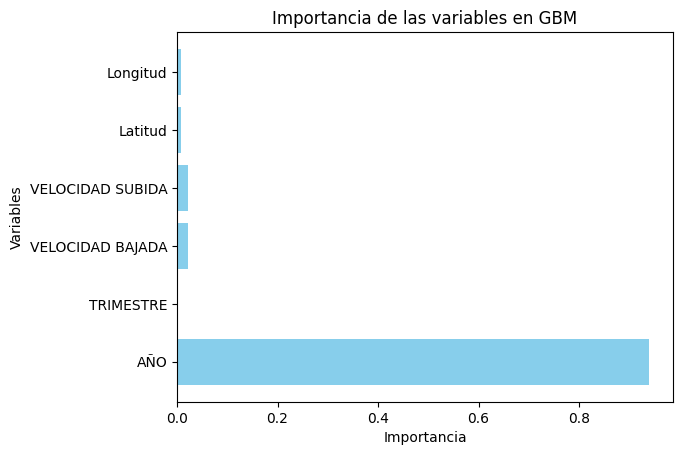

In [15]:
# Visualizar la importancia de las variables
plt.barh(variables, importancias, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en GBM')
plt.show()

# Conclusiones del Modelo Gradient Boosting Machine (GBM)

## 1. **Desempeño del Modelo**
- **Error Cuadrático Medio (MSE):** `303,288.98`  
   El error cuadrático medio muestra que las predicciones del modelo tienen un margen de error considerable en términos absolutos. Aunque no es ideal, se encuentra en el mismo rango que los modelos anteriores.

- **Coeficiente de Determinación (R²):** `0.2189`  
   El valor de R² indica que el modelo **GBM** logra explicar aproximadamente el **21.9%** de la variabilidad en los datos. Aunque es una ligera mejora respecto a otros modelos simples como **Regresión Lineal** y similar a **XGBoost**, sigue siendo insuficiente para un modelo robusto.

---

## 2. **Importancia de las Variables**
- La variable **AÑO** es, nuevamente, la más influyente en el modelo, con una importancia abrumadora respecto a las demás variables. Esto refuerza la idea de que los accesos fijos a Internet tienen una fuerte relación temporal.
- Las demás variables:
  - **VELOCIDAD BAJADA** y **VELOCIDAD SUBIDA** muestran una influencia mínima en el modelo, lo cual sugiere que no tienen suficiente variabilidad o peso explicativo.
  - **Latitud** y **Longitud**, que representan la ubicación geográfica, tienen un aporte insignificante al modelo.
  - **TRIMESTRE** tiene una contribución prácticamente nula.

---

## 3. **Comparación con Modelos Anteriores**
- **MSE:** El error del modelo GBM (`303,288.98`) es comparable al de XGBoost (`303,949.16`) y ligeramente superior a Random Forest (`313.75` después de ingeniería de características). Sin embargo, no alcanza la reducción de error lograda con otros modelos tras la incorporación de características.
- **R²:** Con `0.2189`, el modelo GBM presenta un desempeño muy similar a XGBoost y Random Forest antes de aplicar ingeniería de características. Esto sugiere que GBM no está aprovechando las nuevas características de manera significativa.

---

## 4. **Conclusiones Finales**
- El **GBM** no logró una mejora considerable en el desempeño respecto a modelos previos (Random Forest y XGBoost).
- La **variable temporal (AÑO)** continúa siendo la más importante, indicando que otros factores no explican la variabilidad del objetivo de manera efectiva.
- Se podrían considerar las siguientes acciones:
  - Explorar la interacción entre variables o transformaciones no lineales.
  - Probar modelos más complejos, como redes neuronales.
  - Realizar ajustes adicionales a los hiperparámetros del modelo GBM.
  - Incluir nuevas características más representativas, como información demográfica o infraestructura tecnológica.

---

## 5. **Recomendaciones**
- Ajustar hiperparámetros de **GBM** (por ejemplo: `learning_rate`, `max_depth`, `subsample`) para evaluar su impacto en el desempeño.
- Evaluar modelos de **boosting** más avanzados como **CatBoost** o **LightGBM**.
- Continuar con la **ingeniería de características** y análisis exploratorio para mejorar la calidad y representación de los datos.
